# Introdução

Nos projetos de machine learning é comum compararmos diversos modelos e selecionar aquele cuja performance se destaca dos demais. Uma das coisas que podemos fazer para melhorar a performance dos algoritmos é encontrar a melhor arquitetura para estes. Quando falamos em arquitetura, estamos falando de parâmetros que definimos previamente, ou seja, é algo definido antes do treinamento do modelo. Dessa forma, existem diversas técnicas que nos ajudam a buscar qual melhor conjunto de parâmetros que mais favorece o aprendizados dos algoritmos.

Alguns desses métodos são:

- Grid Search 
- Randomized Search
- Bayesian Search
- Algoritmos Genéticos

Esses métodos se diferenciam em velocidade e também em forma. Nas nossas aulas, abordaremos os 2 primeiros e explanaremos um pouco sobre o terceiro.


# Grid Search CV

## O que é Grid Search CV

É sabido que não conhecemos qual melhor arquitetura para nossos modelos de maneira prévia. Assim sendo, uma abordagem que podemos ter para resolver o problema da arquitetura é testar exaustivamente até encontrar o melhor conjunto. O Grid Search CV faz isso. Na prática, ele é um algoritmo que está dentro do sklearn e podemos utilizá-lo junto da validação cruzada, que vimos nas aulas anteriores, para encontrar esse melhor conjunto, de forma automatizada.



## Como o Grid Search Funciona?

Como o próprio nome já diz, Grid Search trata-se de uma busca em grade. A grade é o conjunto dos possíveis valores que os hiperparâmetros podem assumir. Quando temos apenas 2 hiperparâmetros, conseguimos visualizar a grade desas forma.

<img src="https://raw.githubusercontent.com/v-popov/blog/master/cross-validation/gridsearch.png" width=500>

Para preparar nosso espaço de busca, criamos dicionários.

 { 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf',’linear’,'sigmoid']  }
   
Aqui, queremos testar valores de C, gamma e também o tipo de kernel a ser usado em uma SVM. Uma observação importante é que apenas os hiperparâmetros definidos no dicionário serão variados. Os demais serão definidos como default.

Na prática, o grid search vai rodar uma validação cruzada para cada possível combinação de valores desse dicionário. A ideia é trazer o conjunto que produz o menor erro de validação/melhor performance de validação.

Após a otimização dos hiperparâmetros, podemos estimar o erro em uma base de teste, ainda não vista.

# Prática Guiada: Demonstração de `GridSearchCV`

Vamos usar o conjunto de dados iris... que já conhecemos bem.

Veremos como usar `GridSearchCV` para otimizar o hiperparâmetro `k` do algoritmo de vizinhos mais próximos.

[aqui](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf) há um link para o paper de Ronald Fisher, que usou este conjunto de dados em 1936.

In [55]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [9]:
# separando x e y
df = load_iris()
X = df.data
y = df.target

In [10]:
# Split de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=123)
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

## 1. Escrevendo os parâmetros à mão

É claro que, dependendo do modelo, os hiperparâmetros podem ter um efeito considerável na qualidade da previsão. 

In [11]:
# stratified kfold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [15]:
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=skf,scoring='accuracy')
    k_scores.append(scores.mean())

In [16]:
import numpy as np
np.amax(k_scores)

0.9833333333333332

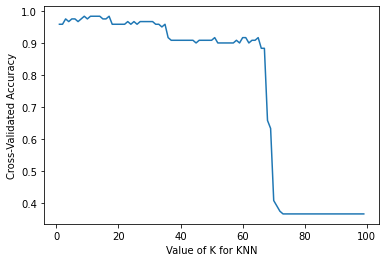

In [17]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [19]:
k_range[np.argmax(k_scores)]

9

Como sempre, observamos que o desempenho muda para diferentes valores do hiperparâmetro. <br />
Como podemos sistematizar essa pesquisa e adicionar mais hiperparâmetros à exploração? 

## Usando `GridSearch`


In [20]:
from sklearn.model_selection import GridSearchCV

É definida uma lista de parâmetros a serem testados.

In [21]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier(n_neighbors=8)

In [22]:
param_grid = dict(n_neighbors=range(1,31))
print(param_grid)

{'n_neighbors': range(1, 31)}


Instanciar o método `GridSearchCV` (O CV no final do nome é de Cross Validation. Esse módulo já faz cross validation)

In [23]:
grid = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy')

Fazer o ajuste

In [24]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

`GridSeachCV` retorna um dict com muitas informações. Do momento da configuração de cada parâmetro até os scores médios (via validação cruzada). Ele também fornece os scores em cada conjunto de treino e teste da Validação Cruzada K-Fold. 

In [25]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [26]:
pd.DataFrame(grid.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

Vamos ver o melhor modelo:

In [ ]:
grid.best_params_

{'n_neighbors': 8}

In [27]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(KNeighborsClassifier(n_neighbors=9), 0.9833333333333332, {'n_neighbors': 9})

### 2.1 Adicionando outros parâmetros para ajustar

Vamos adicionar o parâmetro binário de peso do algoritmo knn que determina se alguns vizinhos terão mais peso do que outros no momento da classificação. O valor de distância indica que o peso é inversamente proporcional à distância

GridSearchCV exige que a grade de parâmetros a serem verificados venha em um dicionário com os nomes dos parâmetros e a lista dos valores possíveis. 

Observe que o GridSearchCV possui todos os métodos que a API sklearn oferece para modelos preditivos: fit, predict, predict_proba, etc.

In [28]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

Agora a otimização será feita iterando e alternando `weights` e `k` (número de vizinhos próximos).

In [29]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


**Verificar:** 
    1. Como o processo de busca será realizado? 
    2. Quantas vezes o algoritmo terá que ser iterado?

In [40]:
all_combinations = list(itertools.product(k_range,weight_options))

In [42]:
all_combinations


[(1, 'uniform'),
 (1, 'distance'),
 (2, 'uniform'),
 (2, 'distance'),
 (3, 'uniform'),
 (3, 'distance'),
 (4, 'uniform'),
 (4, 'distance'),
 (5, 'uniform'),
 (5, 'distance'),
 (6, 'uniform'),
 (6, 'distance'),
 (7, 'uniform'),
 (7, 'distance'),
 (8, 'uniform'),
 (8, 'distance'),
 (9, 'uniform'),
 (9, 'distance'),
 (10, 'uniform'),
 (10, 'distance'),
 (11, 'uniform'),
 (11, 'distance'),
 (12, 'uniform'),
 (12, 'distance'),
 (13, 'uniform'),
 (13, 'distance'),
 (14, 'uniform'),
 (14, 'distance'),
 (15, 'uniform'),
 (15, 'distance'),
 (16, 'uniform'),
 (16, 'distance'),
 (17, 'uniform'),
 (17, 'distance'),
 (18, 'uniform'),
 (18, 'distance'),
 (19, 'uniform'),
 (19, 'distance'),
 (20, 'uniform'),
 (20, 'distance'),
 (21, 'uniform'),
 (21, 'distance'),
 (22, 'uniform'),
 (22, 'distance'),
 (23, 'uniform'),
 (23, 'distance'),
 (24, 'uniform'),
 (24, 'distance'),
 (25, 'uniform'),
 (25, 'distance'),
 (26, 'uniform'),
 (26, 'distance'),
 (27, 'uniform'),
 (27, 'distance'),
 (28, 'uniform'),
 

In [41]:
len(all_combinations)

60

Para dificultar mais um pouco, vamos introduzir um ```Pipeline```.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [47]:
pipe_knn = Pipeline(steps=[('pre_processor', MinMaxScaler()), ('model', KNeighborsClassifier())])


Quando utilizamos um pipeline, precisamos mudar o nome das chaves dos dicionários que iremos passar para o Grid Search.

In [50]:
pipe_param_grid = dict(model__n_neighbors=k_range, model__weights=weight_options)
print(pipe_param_grid)

{'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'model__weights': ['uniform', 'distance']}


In [53]:
grid_pipe = GridSearchCV(pipe_knn, pipe_param_grid, cv=skf, scoring='accuracy')
grid_pipe.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('pre_processor', MinMaxScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29, 30],
                         'model__weights': ['uniform', 'distance']},
             scoring='accuracy')

Escolher o melhor modelo

In [54]:
print (grid_pipe.best_estimator_)
print(grid_pipe.best_score_)
print(grid_pipe.best_params_)

Pipeline(steps=[('pre_processor', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=7))])
0.9833333333333332
{'model__n_neighbors': 7, 'model__weights': 'uniform'}


Performance no treino:

In [56]:
knn_best = grid_pipe.best_estimator_
knn_best.fit(X_train, y_train)
accuracy_score(y_train, knn_best.predict(X_train))

0.9833333333333333

In [57]:
accuracy_score(y_test, knn_best.predict(X_test))

0.9333333333333333